Dimensionality Reduction Techniques on Tabular data.
Dataset used is mushroom data. 
Dataset consists of 8124 samples and 23 features (8124,23). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Connect to driv eto load data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load dataset from drive

In [5]:
filename = '/content/gdrive/MyDrive/mushrooms.csv'
data = pd.read_csv(filename,error_bad_lines=False, engine="python")

In [7]:
print(data.shape)
data.head(5)

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Dataset provided is categorical data. Convert the data set to numeric fields by label encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in data.columns:
  data[col] = encoder.fit_transform(data[col])
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


2D plot for data visualization after applying dimensionality reduction on the datset

In [13]:
def complete_test_2D(X, Y, plot_name = ''):
    
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, Y], axis = 1)
    Small_df['class'] = LabelEncoder().fit_transform(Small_df['class'])
    # forest_test(X, Y)
    
    plt.figure.figsize=(10,8)

    classes = [1, 0]
    colors = ['r', 'b']
    
    for clas, color in zip(classes, colors):
        
        plt.scatter(Small_df.loc[Small_df['class'] == clas, 'C1'], 
                Small_df.loc[Small_df['class'] == clas, 'C2'], 
                c = color, alpha=0.5)
    
        plt.xlabel('Component 1', fontsize = 12)
        plt.ylabel('Component 2', fontsize = 12)
        plt.title(f'{plot_name}', fontsize = 15)
        plt.legend(['Poisonous', 'Edible'])
        plt.grid(False)
        
    plt.show()

3D plot for data visualization after applying diemnsionality reduction technique 

In [14]:
def complete_test_3D(X, Y, plot_name = ''):
    
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2', 'C3'])
    Small_df = pd.concat([Small_df, Y], axis = 1)
    Small_df['class'] = LabelEncoder().fit_transform(Small_df['class'])
    # forest_test(X, Y)
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1, projection="3d")
    
    pnt3d = ax.scatter(Small_df['C1'],Small_df['C2'],Small_df['C3'],
                       c=Small_df['class'],alpha=.5, s=75,cmap='coolwarm',
                       label=list(Small_df.columns))
    
    
    one = mpatches.Patch(facecolor='b', label='0', linewidth = 0.5, edgecolor = 'black')
    two = mpatches.Patch(facecolor='r', label = '1', linewidth = 0.5, edgecolor = 'black')
    ax.set_title(f'{plot_name}', fontsize = 15)
    ax.set(xlabel=f'\n{Small_df.columns[0]}',ylabel=f'\n{Small_df.columns[1]}',zlabel=f'\n{Small_df.columns[2]}')
    ax.legend(handles=[one, two], title="class", fontsize='medium', fancybox=True)
    plt.show()

PCA - Principal Component Analysis

In [15]:
from time import time
import matplotlib.patches as mpatches

xvariables = data.drop(['class'], axis = 1)
yvariables= data['class']
starttimePCA = time()
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(xvariables)
endtimePCA = time()
print("time:", endtimePCA-starttimePCA)
print(X_PCA.shape)

time: 0.07879352569580078
(8124, 3)


Visualize the data after applying PCA

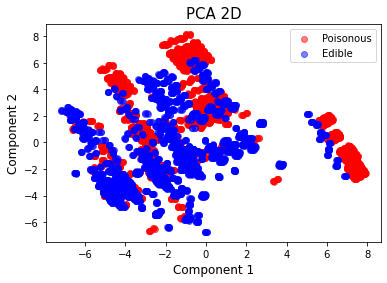

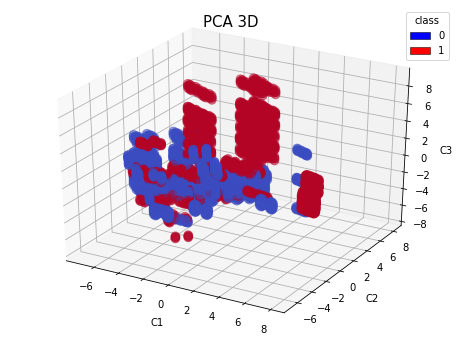

In [16]:
complete_test_2D(X_PCA[:,0:2],yvariables,"PCA 2D")
complete_test_3D(X_PCA,yvariables,"PCA 3D")

LLE - Local Linear Embedded

In [18]:
n_neighbors=30
from sklearn.manifold import LocallyLinearEmbedding
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='standard')
starttimeLLE = time()
lle = LocallyLinearEmbedding(n_neighbors, n_components=3,method='standard')
X_LLE = lle.fit_transform(xvariables)
endtimeLLE = time()
print("time_LLE %.2fs" %(endtimeLLE-starttimeLLE))
print("Reconstruction error: %g" % lle.reconstruction_error_)

time_LLE 4.01s
Reconstruction error: 8.37926e-18


Visualize the data after applying LLE

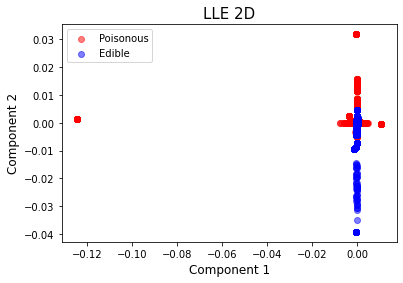

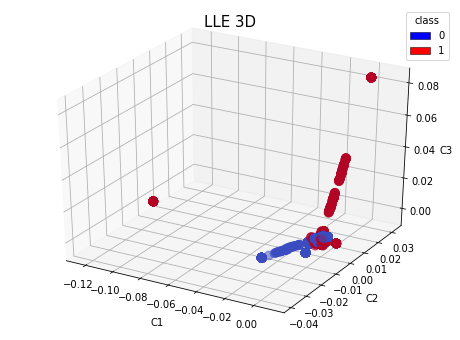

In [19]:
complete_test_2D(X_LLE[:,0:2], yvariables, "LLE 2D")
complete_test_3D(X_LLE, yvariables,"LLE 3D")

t-SNE - t Distributed Stochastic Neighbor Embedding

In [20]:
from sklearn.manifold import TSNE
from sklearn import manifold
starttimetSNE = time()
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tSNE = tsne.fit_transform(xvariables)
endtimetSNE = time()
print("time_tSNE %.2fs" %(endtimetSNE-starttimetSNE))

time_tSNE 195.36s


Visualize the data after applying tSNE

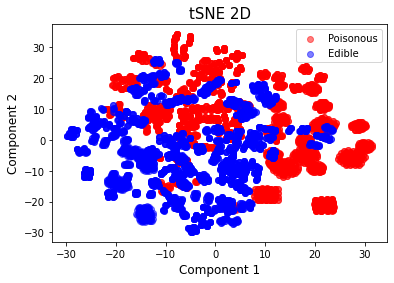

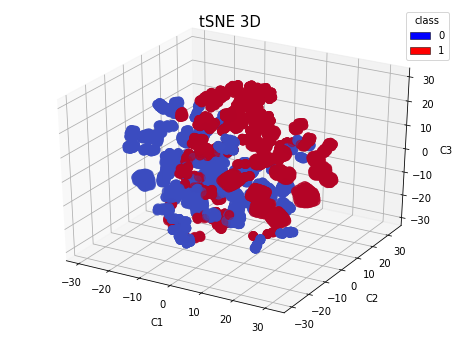

In [21]:
complete_test_2D(X_tSNE[:,0:2], yvariables,"tSNE 2D")
complete_test_3D(X_tSNE, yvariables, "tSNE 3D")

ISOMAP - Isometric Mapping

In [22]:
from sklearn.manifold import Isomap
starttimeISOMAP = time()
isomap = manifold.Isomap(n_neighbors, n_components=3)
x_ISOMAP = isomap.fit_transform(xvariables)
endtimeISOMAP = time()
print("time_ISOMAP %.2fs" %(endtimeISOMAP-starttimeISOMAP))

time_ISOMAP 51.03s


Visualize the data after applying ISOMAP

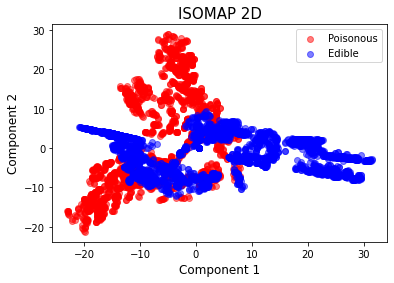

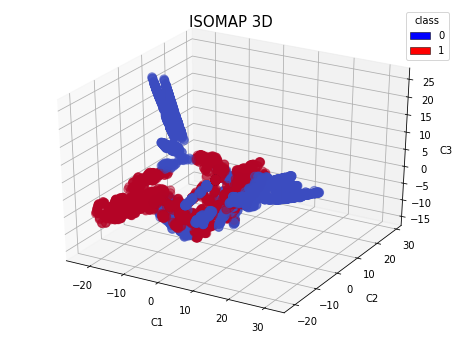

In [23]:
complete_test_2D(x_ISOMAP[:,0:2], yvariables, "ISOMAP 2D")
complete_test_3D(x_ISOMAP, yvariables, "ISOMAP 3D")

UMAP

In [24]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 43.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=6d9180c8d0a1d818e012c8110ad533955a47aa5452e34053978bfc01eca4de1c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=8abee1f4312e7bcde1fc0b3e7bb9b08805c88c80265c11edb182a51ab5ca2e34
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [25]:
import umap.umap_ as umap
starttimeUMAP = time()
umap = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=1,
        n_components=3,
        metric='euclidean'
    )
X_UMAP = umap.fit_transform(xvariables)
endtimeUMAP = time()
print("time_UMAP %.2fs" %(endtimeUMAP-starttimeUMAP))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


time_UMAP 49.49s


Visualize the data after applying UMAP

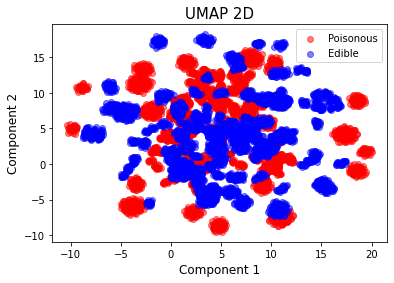

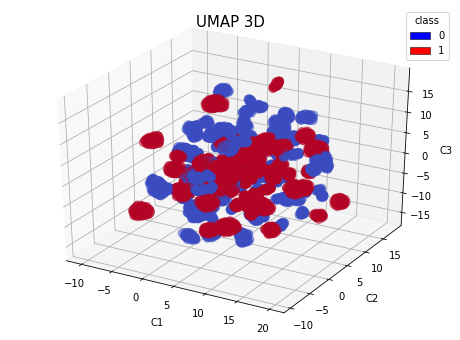

In [29]:
complete_test_2D(X_UMAP[:,0:2], yvariables, "UMAP 2D")
complete_test_3D(X_UMAP, yvariables, "UMAP 3D")

SVD - Single Vector Decomposition 

In [30]:
from sklearn.decomposition import TruncatedSVD
starttimeSVD = time()
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(xvariables)
endtimeSVD = time()
print(X_reduced.shape)
print("time_SVD %.2fs" %(endtimeSVD-starttimeSVD))

(8124, 3)
time_SVD 0.06s


Visualize the dat after applying SVD

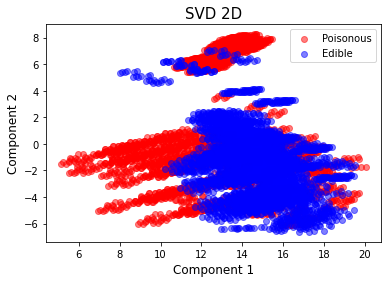

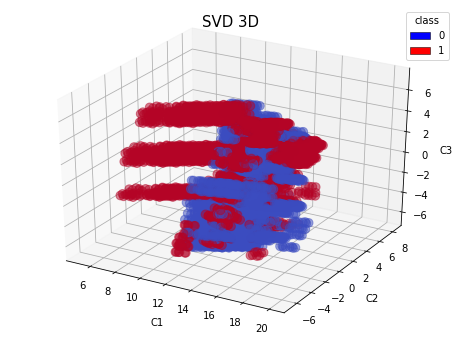

In [31]:
complete_test_2D(X_reduced[:,0:2], yvariables, "SVD 2D")
complete_test_3D(X_reduced, yvariables, "SVD 3D")

0.9960372066346446


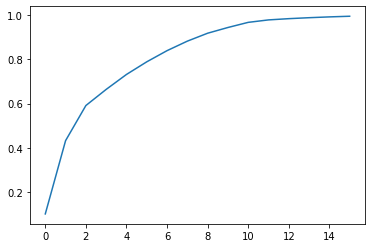

In [32]:
svd1 = TruncatedSVD(n_components=16)
x_SVDreduced = svd1.fit_transform(xvariables)
print(svd1.explained_variance_ratio_.sum())
plt.plot(np.cumsum((svd1.explained_variance_ratio_)))

Conclusion:

Comparing all the dimensionality techniques based on the time take to build the model and reduce the dimensionality of datset, the techniques are arranged in ascending order - PCA<SVD<LLE<ISOMAP<UMAP<tSNE.
Comparing based the components from reduced data and visualization of data after applying technique - UMAP is best as the data points far from each other showing distinction between them.